In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()
iris.keys()
iris_data = iris.data
iris_target = iris.target
df_iris = pd.DataFrame(data = iris_data, columns=iris.feature_names)

In [2]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [4]:
df_target = pd.DataFrame(data = iris_target, columns=['label'])
data = pd.concat([df_iris, df_target], axis=1)

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.utils import to_categorical

nb_classes = 3

y = to_categorical(y, nb_classes)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

X

array([[[5.1],
        [3.5],
        [1.4],
        [0.2]],

       [[4.9],
        [3. ],
        [1.4],
        [0.2]],

       [[4.7],
        [3.2],
        [1.3],
        [0.2]],

       [[4.6],
        [3.1],
        [1.5],
        [0.2]],

       [[5. ],
        [3.6],
        [1.4],
        [0.2]],

       [[5.4],
        [3.9],
        [1.7],
        [0.4]],

       [[4.6],
        [3.4],
        [1.4],
        [0.3]],

       [[5. ],
        [3.4],
        [1.5],
        [0.2]],

       [[4.4],
        [2.9],
        [1.4],
        [0.2]],

       [[4.9],
        [3.1],
        [1.5],
        [0.1]],

       [[5.4],
        [3.7],
        [1.5],
        [0.2]],

       [[4.8],
        [3.4],
        [1.6],
        [0.2]],

       [[4.8],
        [3. ],
        [1.4],
        [0.1]],

       [[4.3],
        [3. ],
        [1.1],
        [0.1]],

       [[5.8],
        [4. ],
        [1.2],
        [0.2]],

       [[5.7],
        [4.4],
        [1.5],
        [0.4]],

       [

In [7]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
n_steps = X.shape[1]
n_steps

4

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam

def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary() 

input_shape =>  4 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 50)                9650      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 70ms/step - loss: 1.1125 - accuracy: 0.5750 - val_loss: 0.9022 - val_accuracy: 0.5667
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.7983 - accuracy: 0.6917 - val_loss: 0.6833 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5963 - accuracy: 0.7167 - val_loss: 0.5292 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.4501 - accuracy: 0.7250 - val_loss: 0.4039 - val_accuracy: 0.7667
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.3693 - accuracy: 0.9333 - val_loss: 0.3568 - val_accuracy: 0.7667
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3184 - accuracy: 0.8833 - val_loss: 0.2510 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2660 - accuracy: 0.9500 - val_loss: 0.2057 - val_accuracy: 1.0000
Epoch 8/100
4/4 [===

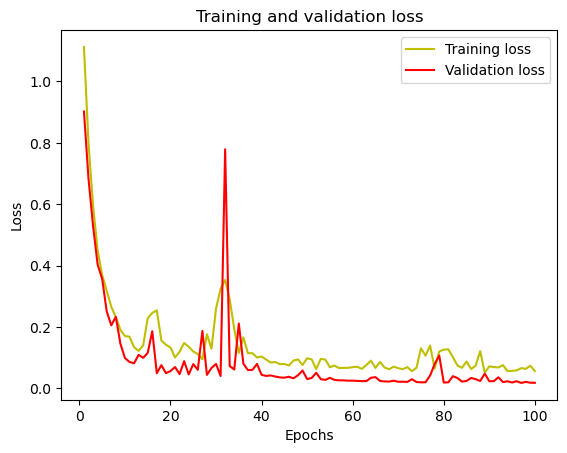

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

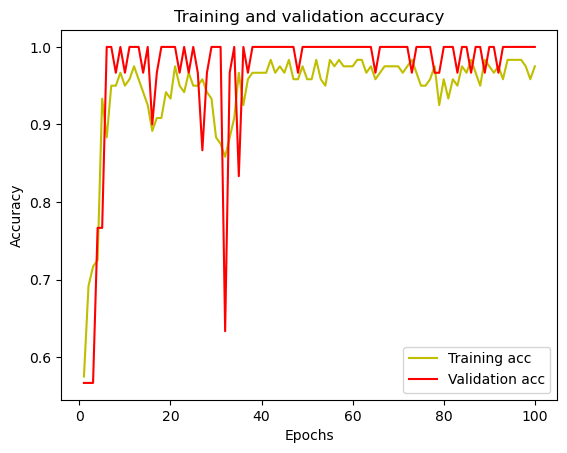

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
